In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from inline_tensorboard import show_graph
from IPython.display import Image

In [2]:
sess = tf.InteractiveSession()

In [3]:
!rm -rf ./summaries

# Let's generate some data

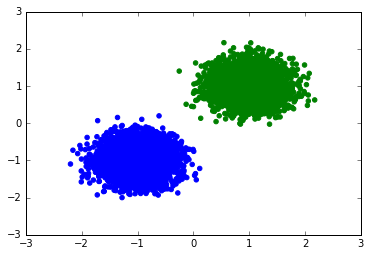

In [4]:
x11, x12 = np.random.multivariate_normal([1, 1], 0.1 * np.eye(2), 5000).T
x21, x22 = np.random.multivariate_normal([-1, -1], 0.1 * np.eye(2), 5000).T

x_ = np.array([np.concatenate([x11, x21]),
              np.concatenate([x12, x22])]).T
y_ = np.array([0] * 5000 + [1] * 5000)

plt.scatter(x_[:,0], x_[:,1], color=['g'] * 5000 + ['b'] * 5000)
plt.show()

# Variable summaries

In [5]:
def variable_summaries(var, name='summaries'):
    with tf.name_scope(name):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))

# Network

$h = W x + b$  
$\hat{y} = \sigma(h)$

In [6]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [7]:
def get_neuron(x):
    W = tf.Variable(np.array([1.,1.]), 
                    dtype=tf.float32,
                    name="Weight")
    
    # add summaries
    variable_summaries(W, "Weight")
    
    b = tf.Variable(np.array([0.],),
                    dtype=tf.float32,
                    name="bias")
    
    # add summaries
    variable_summaries(b, "bias")

    prod = tf.reduce_sum(W * x) + b
    neuron = 1 / (1 + tf.exp(-prod))
    
    return neuron

In [8]:
x = tf.placeholder(tf.float32, name="input")
prediction = get_neuron(x)

In [9]:
target = tf.placeholder(tf.float32)
loss   = (prediction - target) ** 2

In [10]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
optimize  = optimizer.minimize(loss)

Merge all the summaries and write them out to the directory `./summaries`.

In [11]:
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter('./summaries', sess.graph)

In [12]:
tf.global_variables_initializer().run()

In [13]:
loss_history = []

for iteration in range(1000):
    index = np.random.randint(0, 10000)
    placeholder_values = {
        x:      x_[index],
        target: y_[index]
    }
    
    summary, t_loss, _ = sess.run([merged, loss, optimize], feed_dict=placeholder_values)
    loss_history.append(t_loss)
    
    writer.add_summary(summary, iteration)

# Tensorboard

Run tensorboard using the command:

    $ tensorboard --logdir=./summaries
    
Navigate to [http://0.0.0.0:6006/](http://0.0.0.0:6006/) in your browser.